In [1]:
!pip freeze

altair==4.2.2
annotated-types==0.7.0
anyio==4.5.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==24.2.0
babel==2.16.0
backoff==2.2.1
beautifulsoup4==4.12.3
bleach==6.1.0
cattrs==24.1.1
certifi==2024.8.30
cffi==1.17.1
charset-normalizer==3.3.2
colorama==0.4.6
comm==0.2.2
contourpy==1.3.1
cryptography==43.0.1
cycler==0.12.1
debugpy==1.8.5
decorator==5.1.1
defusedxml==0.7.1
docstring-to-markdown==0.15
entrypoints==0.4
et-xmlfile==1.1.0
executing==2.1.0
fastjsonschema==2.20.0
fonttools==4.55.0
fqdn==1.5.1
great-expectations==1.1.0
greenlet==3.1.1
h11==0.14.0
httpcore==1.0.5
httpx==0.27.2
idna==3.10
ipykernel==6.29.5
ipython==8.27.0
ipywidgets==8.1.5
isoduration==20.11.0
jedi==0.19.1
jedi-language-server==0.41.4
Jinja2==3.1.4
joblib==1.4.2
json5==0.9.25
jsonpointer==3.0.0
jsonschema==4.23.0
jsonschema-specifications==2023.12.1
jupyter==1.1.1
jupyter-console==6.6.3
jupyter-events==0.10.0
jupyter-lsp==2.2.5
jupyter_client==8.6.3
jupyter_

In [4]:
!pip install seaborn
# !pip install xgboost


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install xgboost

  Using cached xgboost-2.1.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.2-py3-none-win_amd64.whl (124.9 MB)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
# Loading the source data
df = pd.read_csv('DAYTON_hourly.csv')
df.head()

,Datetime,DAYTON_MW
0,31/12/2004 01:00,1596
1,31/12/2004 02:00,1517
2,31/12/2004 03:00,1486
3,31/12/2004 04:00,1469
4,31/12/2004 05:00,1472


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121275 entries, 0 to 121274
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Datetime   121275 non-null  object
 1   DAYTON_MW  121275 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


In [4]:
df['Datetime'] = pd.to_datetime(df['Datetime'],
                                dayfirst=True)
df['DAYTON_MW'] = df['DAYTON_MW'].astype('int16')
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121275 entries, 0 to 121274
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Datetime   121275 non-null  datetime64[ns]
 1   DAYTON_MW  121275 non-null  int16         
dtypes: datetime64[ns](1), int16(1)
memory usage: 1.2 MB


In [5]:
df.describe()

,DAYTON_MW
count,121275.000000
mean,2037.851140
std,393.403153
min,982.000000
25%,1749.000000
50%,2009.000000
75%,2279.000000
max,3746.000000


In [5]:
# Setting the date column as index
df = df.set_index('Datetime')

# Viewing the first 5 rows
df.head()

,DAYTON_MW
Datetime,
2004-12-31 01:00:00,1596
2004-12-31 02:00:00,1517
2004-12-31 03:00:00,1486
2004-12-31 04:00:00,1469
2004-12-31 05:00:00,1472


In [22]:
# Viewing the last 5 rows
df.tail()

,DAYTON_MW
Datetime,
2018-01-01 20:00:00,2732
2018-01-01 21:00:00,2724
2018-01-01 22:00:00,2664
2018-01-01 23:00:00,2614
2018-01-02 00:00:00,2552


In [6]:
df.describe()

,DAYTON_MW
count,121275.000000
mean,2037.851140
std,393.403153
min,982.000000
25%,1749.000000
50%,2009.000000
75%,2279.000000
max,3746.000000


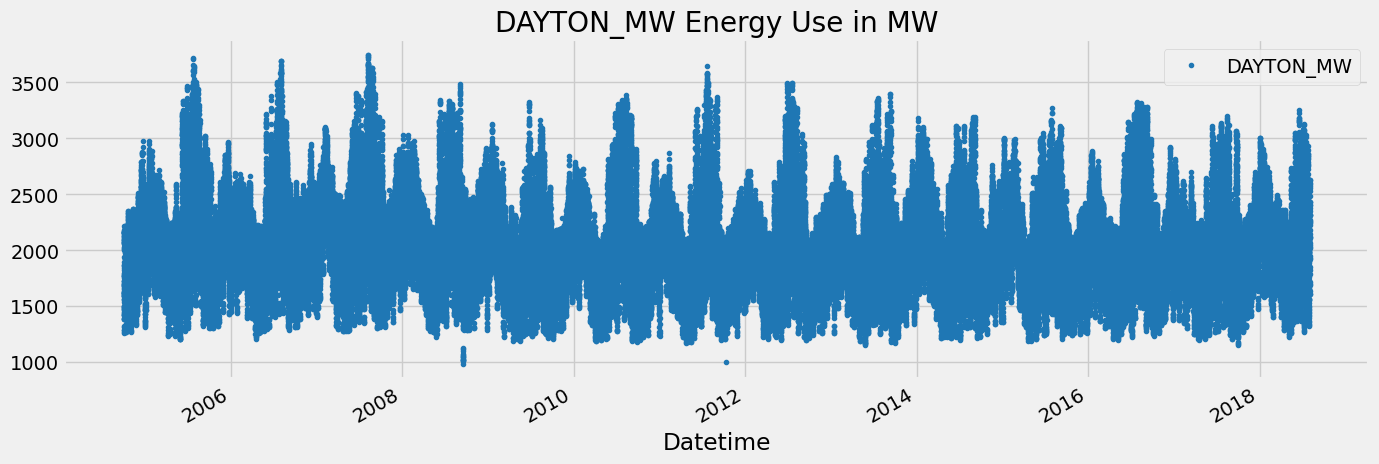

In [28]:
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='DAYTON_MW Energy Use in MW')
plt.show()

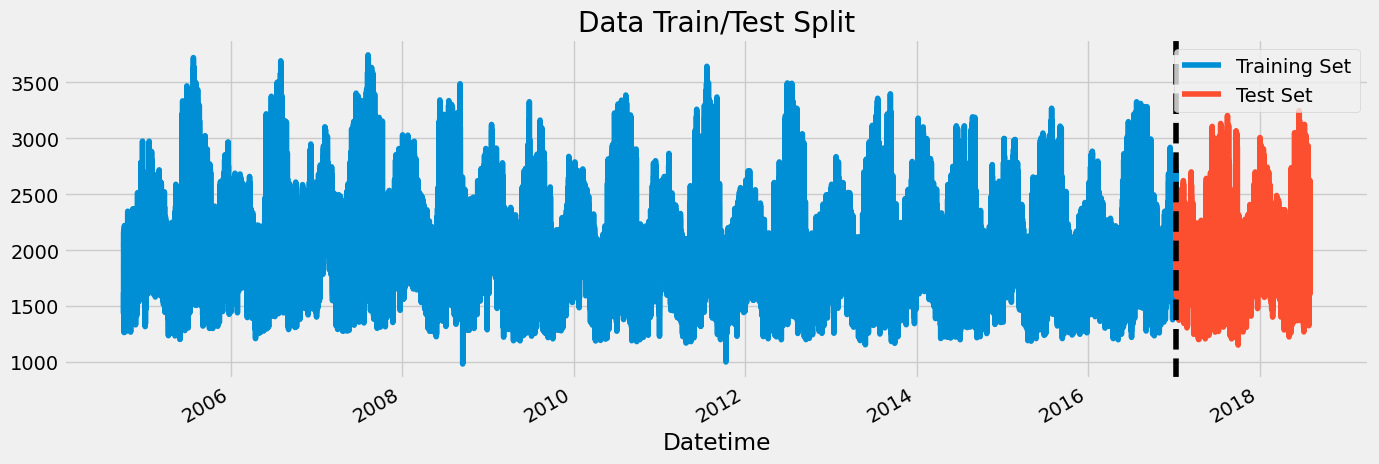

In [6]:
train = df.loc[df.index < '01/10/2017']
test = df.loc[df.index >= '01/10/2017']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01/10/2017', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

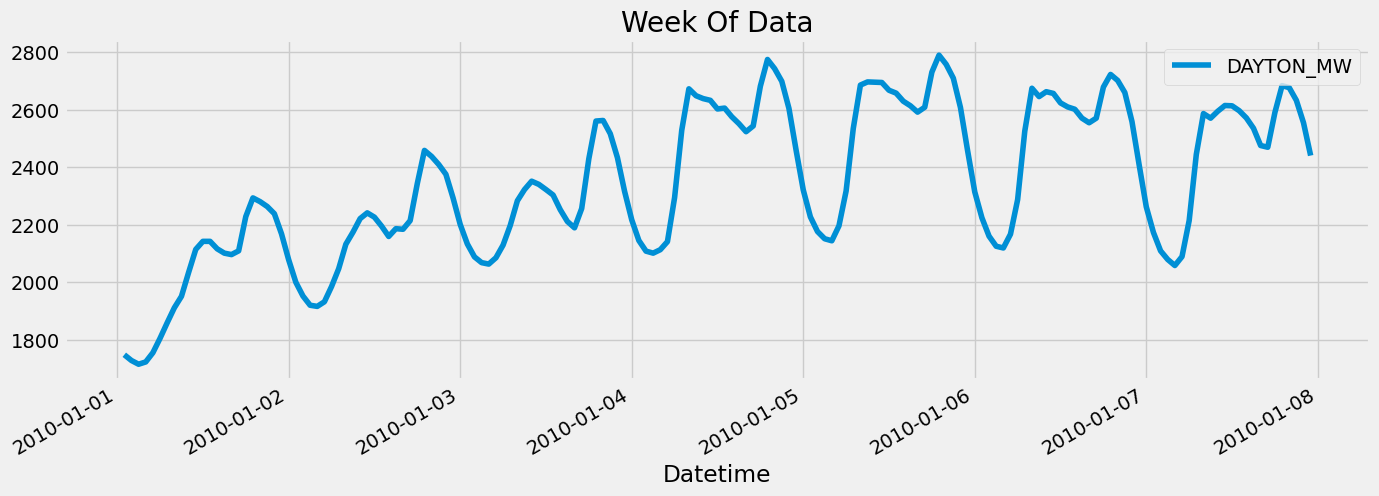

In [25]:
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

In [7]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

In [8]:
df.columns

Index(['DAYTON_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

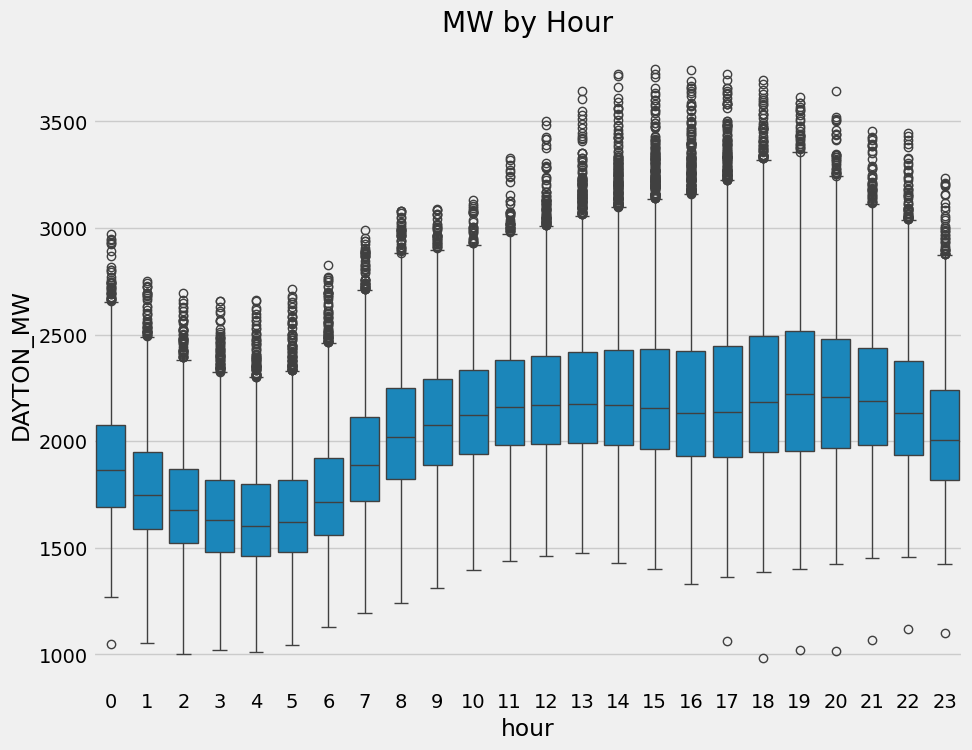

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='DAYTON_MW')
ax.set_title('MW by Hour')
plt.show()

C:\Users\OKOPI ODUMU\AppData\Local\Temp\ipykernel_6984\3596223879.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='month', y='DAYTON_MW', palette='Blues')


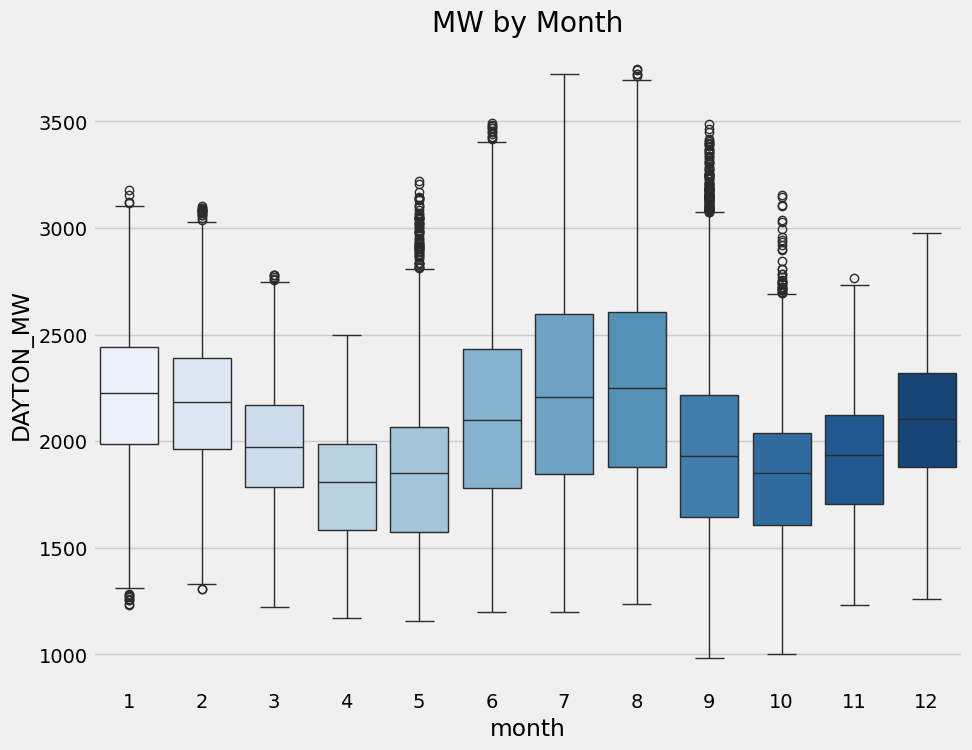

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='DAYTON_MW', palette='Blues')
ax.set_title('MW by Month')
plt.show()

In [8]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [9]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'DAYTON_MW'

train_X = train[FEATURES]
train_y = train[TARGET]

test_X = test[FEATURES]
test_y = test[TARGET]

In [10]:
import xgboost as xgb
import sklearn 
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(train_X, train_y,
        eval_set=[(train_X, train_y), (test_X, test_y)],
        verbose=100)

[0]	validation_0-rmse:2059.45090	validation_1-rmse:2016.00565
[100]	validation_0-rmse:798.66352	validation_1-rmse:755.56726
[200]	validation_0-rmse:375.19362	validation_1-rmse:346.56713
[300]	validation_0-rmse:257.27890	validation_1-rmse:247.12735
[400]	validation_0-rmse:226.01791	validation_1-rmse:229.83496
[500]	validation_0-rmse:215.60056	validation_1-rmse:227.36982
[585]	validation_0-rmse:210.99973	validation_1-rmse:227.48279


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [1]:
 import sys
print(sys.executable) 

C:\03_CHM SESSION JULY-DECEMBER 2024WISDOM CLASS\DATA SCIENCE-MACHINE LEARNING\myenv_dscience\Scripts\python.exe


In [11]:
# Import the necessary metrics to grade our model/algorithm performance
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,r2_score,max_error

In [12]:
from time import time

#Import all the availble regressors
from sklearn.linear_model import LinearRegression, RANSACRegressor,Ridge,Lasso, SGDRegressor,TweedieRegressor
from sklearn.linear_model import ARDRegression, HuberRegressor, PassiveAggressiveRegressor, TheilSenRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor 
from sklearn.ensemble import AdaBoostRegressor, VotingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [13]:
# Create a dataframe to store the model training performance
regressor_index = 0 # for counting iterations
time_series_performance_df = pd.DataFrame(columns= 
                        ['train_time','train_score','test_score','root_mean_square_error','model'])

In [15]:
# Create a list of the available linear regressor models
linear_regressors = [
    ARDRegression(), 
    HuberRegressor(),
    LinearRegression(),
    PassiveAggressiveRegressor(),
    RANSACRegressor(),
    Ridge(),
    Lasso(), 
    #SGDRegressor(),
    TheilSenRegressor(),
    TweedieRegressor()
    ]

In [16]:
# Iterating over ensemble regressors
for model in linear_regressors:
   #Training the model (each regressors)
    start = time()
    model.fit(train_X, train_y)
    train_time = time() - start
    
    #predicting the entire train data
    start = time()
    y_pred = model.predict(train_X)
    
    print(model)
    print("Training time: %0.3fs" % train_time)
    train_score = np.round(model.score(train_X, train_y)*100,2)
    print(f"R2 training score: {train_score}")
    #print(final_df)
    
    # Testing the model on test data
    test_pred = model.predict(test_X)
    test_score = np.round(r2_score(test_y, test_pred)*100,2)
    print(f"R2 Test score: {test_score}")
    
    # Calculating root mean square error
    mse = np.round(mean_squared_error(test_y, test_pred)*100,2)
    rmse = np.round(np.sqrt(mse),2)
    print(f"Root Mean Square error: {rmse}")
    
    #test_y.values[0] returns the actual test_y value: 595000
    time_series_performance_df.loc[regressor_index] = \
                            [train_time, train_score, test_score, rmse, model]

    # increment the index
    regressor_index +=1
    print()   
print('Simulation Completed')

ARDRegression()
Training time: 0.799s
R2 training score: 29.76
R2 Test score: 26.3
Root Mean Square error: 3115.07

HuberRegressor()
Training time: 1.372s
R2 training score: 27.65
R2 Test score: 27.38
Root Mean Square error: 3092.2

LinearRegression()
Training time: 0.187s
R2 training score: 29.76
R2 Test score: 26.31
Root Mean Square error: 3114.96

PassiveAggressiveRegressor()
Training time: 0.335s
R2 training score: 27.89
R2 Test score: 26.8
Root Mean Square error: 3104.48

RANSACRegressor()
Training time: 0.520s
R2 training score: 14.33
R2 Test score: -2.11
Root Mean Square error: 3666.65

Ridge()
Training time: 0.094s
R2 training score: 29.76
R2 Test score: 26.31
Root Mean Square error: 3114.96

Lasso()
Training time: 0.213s
R2 training score: 29.76
R2 Test score: 26.38
Root Mean Square error: 3113.53

TheilSenRegressor()
Training time: 37.082s
R2 training score: 29.29
R2 Test score: 26.61
Root Mean Square error: 3108.66

TweedieRegressor()
Training time: 7.923s
R2 training score:

In [17]:
# Evaluating the model performance ranking
time_series_performance_df.sort_values(by=['test_score','train_score'], ascending=False)

,train_time,train_score,test_score,root_mean_square_error,model
1,1.371551,27.65,27.38,3092.20,HuberRegressor()
3,0.335363,27.89,26.80,3104.48,PassiveAggressiveRegressor()
7,37.082322,29.29,26.61,3108.66,TheilSenRegressor()
8,7.922639,28.03,26.43,3112.34,TweedieRegressor()
6,0.213188,29.76,26.38,3113.53,Lasso()
2,0.187493,29.76,26.31,3114.96,LinearRegression()
5,0.093776,29.76,26.31,3114.96,Ridge()
0,0.799437,29.76,26.30,3115.07,ARDRegression()
4,0.519525,14.33,-2.11,3666.65,RANSACRegressor()


In [14]:
# Create a list of the available ensemble regressor models
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)

ensemble_regressors = [
    ExtraTreesRegressor(),
    BaggingRegressor(base_estimator=ExtraTreesRegressor()),
    GradientBoostingRegressor(learning_rate=0.3),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    KNeighborsRegressor(),
    VotingRegressor([("gb", reg1), ("rf", reg2)])
]

In [15]:
# Iterating over ensemble regressors (It takes a lot of time to run)
for model in ensemble_regressors:
  #Training the model (each regressors)
    start = time()
    model.fit(train_X, train_y)
    train_time = time() - start
    
    #predicting the entire train data
    start = time()
    y_pred = model.predict(train_X)
    
    print(model)
    print("Training time: %0.3fs" % train_time)
    train_score = np.round(model.score(train_X, train_y)*100,2)
    print(f"R2 training score: {train_score}")
    #print(final_df)
    
    # Testing the model on test data
    test_pred = model.predict(test_X)
    test_score = np.round(r2_score(test_y, test_pred)*100,2)
    print(f"R2 Test score: {test_score}")
    
    # Calculating root mean square error
    mse = np.round(mean_squared_error(test_y, test_pred)*100,2)
    rmse = np.round(np.sqrt(mse),2)
    print(f"Root Mean Square error: {rmse}")
    
    #test_y.values[0] returns the actual test_y value: 595000
    time_series_performance_df.loc[regressor_index] = \
                            [train_time, train_score, test_score, rmse, model]

    # increment the index
    regressor_index +=1
    print()   
print('Simulation Completed')

ExtraTreesRegressor()
Training time: 37.039s
R2 training score: 100.0
R2 Test score: 45.41
Root Mean Square error: 2681.09

BaggingRegressor(base_estimator=ExtraTreesRegressor())
Training time: 309.712s
R2 training score: 99.0
R2 Test score: 48.66
Root Mean Square error: 2599.97

GradientBoostingRegressor(learning_rate=0.3)
Training time: 8.515s
R2 training score: 79.91
R2 Test score: 23.53
Root Mean Square error: 3173.19

DecisionTreeRegressor()
Training time: 1.016s
R2 training score: 100.0
R2 Test score: 24.48
Root Mean Square error: 3153.42

RandomForestRegressor()
Training time: 53.091s
R2 training score: 99.46
R2 Test score: 38.52
Root Mean Square error: 2845.13

AdaBoostRegressor()
Training time: 6.359s
R2 training score: 58.55
R2 Test score: 46.87
Root Mean Square error: 2644.97

KNeighborsRegressor()
Training time: 1.344s
R2 training score: 94.99
R2 Test score: 26.54
Root Mean Square error: 3110.1

VotingRegressor(estimators=[('gb', GradientBoostingRegressor(random_state=1)),


In [16]:
# Evaluating the model performance ranking
time_series_performance_df.sort_values(by=['test_score','train_score'], ascending=False)

,train_time,train_score,test_score,root_mean_square_error,model
7,58.122468,92.66,54.02,2460.42,"VotingRegressor(estimators=[('gb', GradientBoo..."
1,309.711571,99.00,48.66,2599.97,"((ExtraTreeRegressor(random_state=1807692471),..."
5,6.359095,58.55,46.87,2644.97,"(DecisionTreeRegressor(max_depth=3, random_sta..."
0,37.038931,100.00,45.41,2681.09,"(ExtraTreeRegressor(random_state=939351284), E..."
4,53.091435,99.46,38.52,2845.13,"(DecisionTreeRegressor(max_features=1.0, rando..."
6,1.343726,94.99,26.54,3110.10,KNeighborsRegressor()
3,1.015576,100.00,24.48,3153.42,DecisionTreeRegressor()
2,8.515211,79.91,23.53,3173.19,([DecisionTreeRegressor(criterion='friedman_ms...


In [17]:
# Confirming the number of test values
test_y.shape

(13680,)

In [18]:
# Confirming the number of predicted values
test_pred.shape

(13680,)

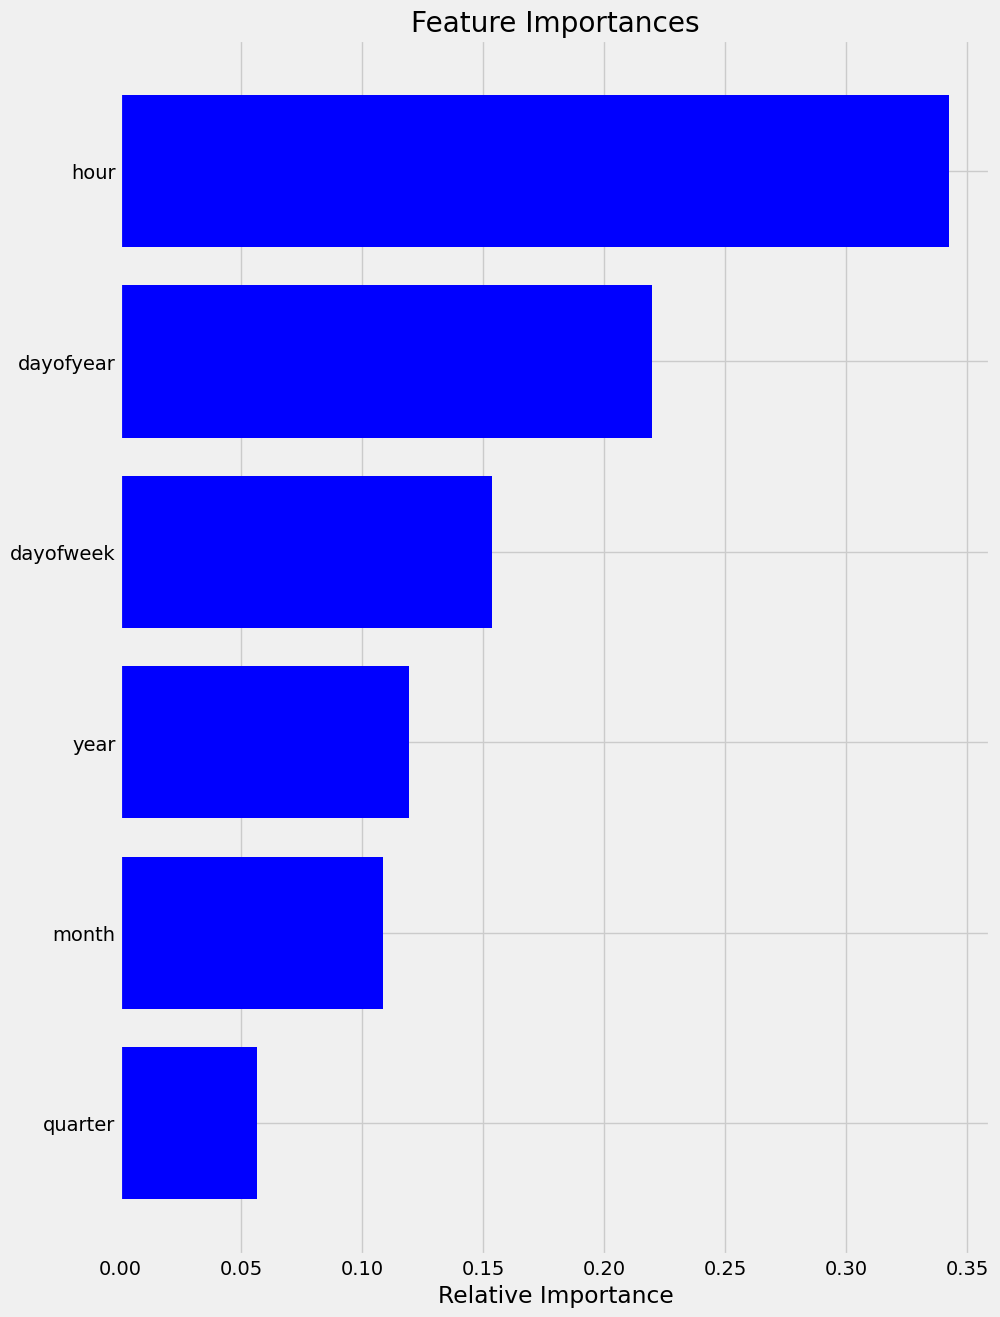

In [19]:
# Extracting the best model
best_model =  ExtraTreesRegressor()

# fitting the model
best_model.fit(train_X, train_y)

features = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

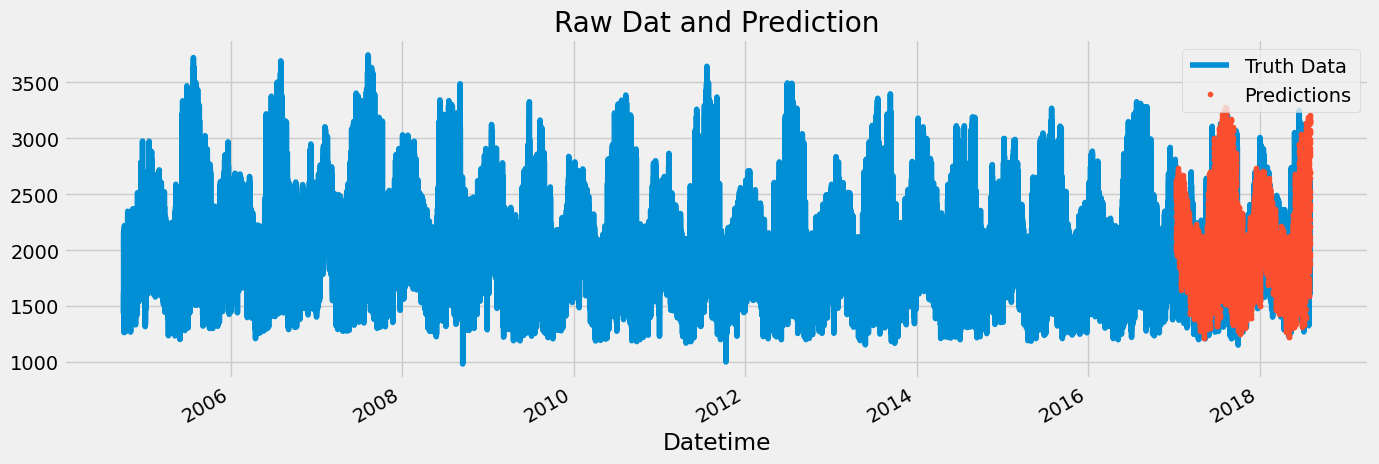

In [22]:
test['prediction'] = best_model.predict(test_X)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['DAYTON_MW']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

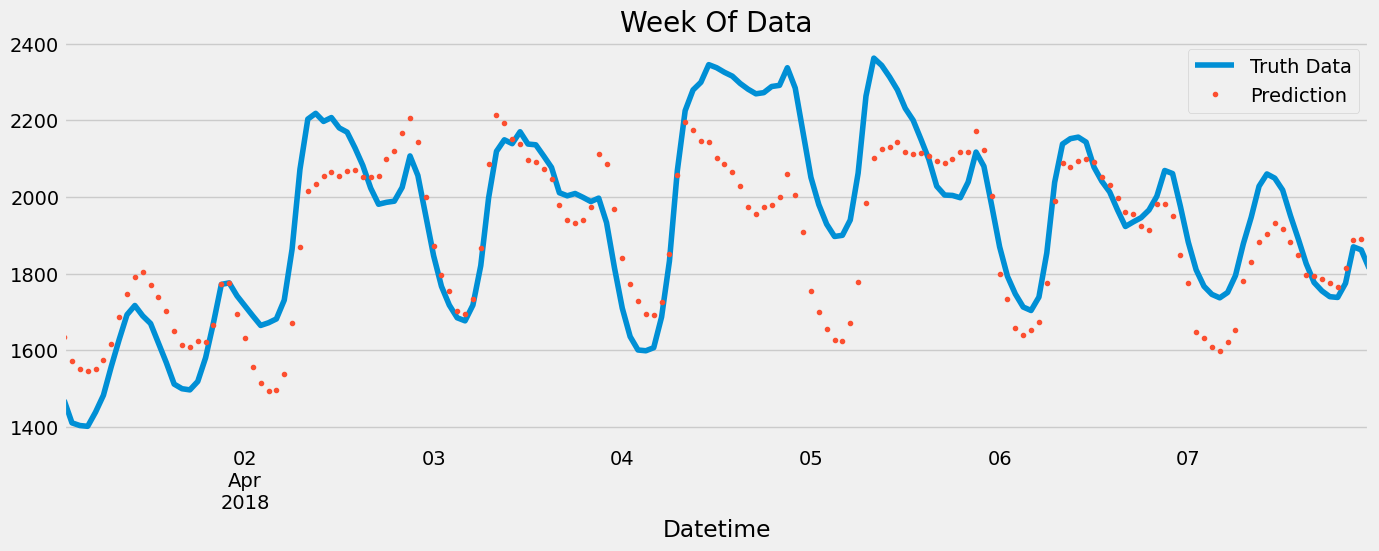

In [23]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['DAYTON_MW'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

In [24]:
score = np.sqrt(mean_squared_error(test['DAYTON_MW'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 268.80


In [25]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2018-01-02    902.114167
2017-09-07    734.103750
2018-07-01    694.624167
2018-07-02    694.110000
2018-01-01    670.044583
2017-08-25    660.395417
2017-09-06    659.123333
2017-09-08    636.583333
2017-01-21    633.731667
2018-01-03    624.022083
Name: error, dtype: float64